In [1]:
import numpy as np
import pandas as pd
import seaborn as sns

### Movies KG

In [2]:
kg_movies = pd.read_csv("./props_wikidata_movielens_small.csv")
kg_movies

,movieId,title,prop,obj,imdbId
0,199,The Umbrellas of Cherbourg,director,Jacques Demy,tt0058450
1,199,The Umbrellas of Cherbourg,screenwriter,Jacques Demy,tt0058450
2,199,The Umbrellas of Cherbourg,composer,Michel Legrand,tt0058450
3,199,The Umbrellas of Cherbourg,genre,drama,tt0058450
4,199,The Umbrellas of Cherbourg,genre,musical film,tt0058450
...,...,...,...,...,...
295782,179053,2048: Nowhere to Run,cast member,Orion Ben,tt7387408
295783,179053,2048: Nowhere to Run,director of photography,Pierre Gill,tt7387408
295784,179053,2048: Nowhere to Run,country of origin,United States of America,tt7387408
295785,179053,2048: Nowhere to Run,narrative location,Los Angeles,tt7387408


In [3]:
kg_movies["prop"].unique()

array(['director', 'screenwriter', 'composer', 'genre', 'cast member',
       'producer', 'award received', 'director of photography',
       'country of origin', 'filming location', 'main subject',
       'film editor', 'nominated for', 'title', 'creator',
       'narrative location', 'costume designer', 'performer',
       'production company', 'part of the series', 'voice actor',
       'executive producer', 'production designer'], dtype=object)

In [4]:
', '.join(list(kg_movies["prop"].unique()))

'director, screenwriter, composer, genre, cast member, producer, award received, director of photography, country of origin, filming location, main subject, film editor, nominated for, title, creator, narrative location, costume designer, performer, production company, part of the series, voice actor, executive producer, production designer'

In [5]:
po_movies = kg_movies.groupby(['prop', 'obj']).count()
po_movies

movieId  \
prop           obj                                                        
award received 10th Moscow International Film Festival                1   
               24th Genie Awards                                      2   
               AACTA Award for Best Actor in a Leading Role           2   
               AACTA Award for Best Actor in a Supporting Role        2   
               AACTA Award for Best Actress in a Leading Role         1   
...                                                                 ...   
voice actor    Ángel De Gracia                                        1   
               Élie Semoun                                            1   
               Éric Baugin                                            1   
               Éric Elmosnino                                         1   
               Ōki Sugiyama                                           1   

                                                                title  imdbId  
prop           obj                                                             
award received 10th Moscow International Film Festival              1       1  
               24th Genie Awards                                    2       2  
               AACTA Award for Best Actor in a Leading Role         2       2  
               AACTA Award for Best Actor in a Supporting Role      2       2  
               AACTA Award for Best Actress in a Leading Role       1       1  
...                                                               ...     ...  
voice actor    Ángel De Gracia                                      1       1  
               Élie Semoun                                          1       1  
               Éric Baugin                                          1       1  
               Éric Elmosnino                                       1       1  
               Ōki Sugiyama                                         1       1  

[81283 rows x 3 columns]

In [6]:
p_count = po_movies.groupby('prop').count().sort_values('movieId', ascending=False)
p_count

,movieId,title,imdbId
prop,,,
cast member,39030,39030,39030
title,9161,9161,9161
screenwriter,5978,5978,5978
producer,4221,4221,4221
director,4109,4109,4109
voice actor,3171,3171,3171
composer,2196,2196,2196
production company,1640,1640,1640
filming location,1619,1619,1619


In [7]:
p_count

,movieId,title,imdbId
prop,,,
cast member,39030,39030,39030
title,9161,9161,9161
screenwriter,5978,5978,5978
producer,4221,4221,4221
director,4109,4109,4109
voice actor,3171,3171,3171
composer,2196,2196,2196
production company,1640,1640,1640
filming location,1619,1619,1619


<Axes: xlabel='movieId', ylabel='prop'>

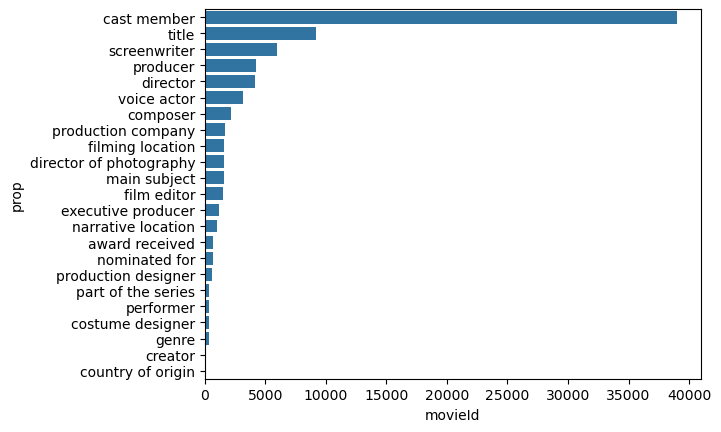

In [8]:
sns.barplot(data=p_count, y="prop", x="movieId")

In [9]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import make_interp_spline


def plot_long_tail(df: pd.DataFrame, column_name: str, y_column: str, y_label: str, title: str, size=-1, figsize=None, 
                   width=0):
    """
    Function that generates the plot of the long tail distribution of attributes and edge types on a Knowledge Graph
    df: Dataframe with groupby done by the column of interest
    column_name: name of the column that was aggregated
    y_column: column with the count of the columns aggregated by
    y_label: label of the y axis on the plot
    title: title of the plot 
    size: cut on the df
    """

    if figsize is not None:
        plt.figure(figsize=figsize)

    df_new = df.reset_index()
    df_bar = df.copy()
    if size > -1:
        df_new = df_new[:size]
        df_bar = df_new.copy()

    # Swap x and y
    y = df_new.index   
    x = df_new[y_column] 

    # Interpolation
    ynew = np.linspace(y.min(), y.max(), 300)
    gfg = make_interp_spline(y, x, k=3)  # Swap x and y in spline

    x_new = gfg(ynew)  # Compute new interpolated x values

    # Plot flipped graph
    plt.plot(x_new, ynew,  color=sns.color_palette(palette='Blues').as_hex()[:][-2])
    plt.rcParams.update({"font.family": "Arial"}) 

    # Labels & Title
    plt.xlabel("Count")  # Now x-axis
    plt.ylabel(ylabel=y_label)  # Now y-axis
    plt.title(title)

    if width == 0:
        sns.barplot(data=df_bar, y=column_name, x=y_column, err_kws={"color": ".5", "linewidth": 3},
            linewidth=1.5, edgecolor=".5", facecolor=(0, 0, 0, 0))
    else:
        sns.barplot(data=df_bar, y=column_name, x=y_column, err_kws={"color": ".5", "linewidth": 3},
            linewidth=1.5, edgecolor=".5", facecolor=(0, 0, 0, 0), width=width)

    plt.show()


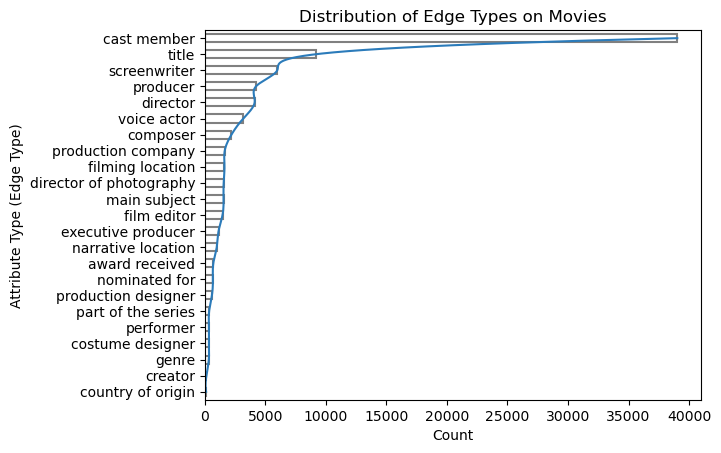

In [10]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import make_interp_spline

p_new = p_count.reset_index()

# Swap x and y
y = p_new.index   # Now becomes y
x = p_new['movieId']  # Now becomes x

# Interpolation
ynew = np.linspace(y.min(), y.max(), 300)
gfg = make_interp_spline(y, x, k=3)  # Swap x and y in spline

x_new = gfg(ynew)  # Compute new interpolated x values

# Plot flipped graph
plt.plot(x_new, ynew,  color=sns.color_palette(palette='Blues').as_hex()[:][-2])
plt.rcParams.update({"font.family": "Arial"}) 

# Labels & Title
plt.xlabel("Count")  # Now x-axis
plt.ylabel("Attribute Type (Edge Type)")  # Now y-axis
plt.title("Distribution of Edge Types on Movies")

sns.barplot(data=p_count, y="prop", x="movieId", err_kws={"color": ".5", "linewidth": 3},
    linewidth=1.5, edgecolor=".5", facecolor=(0, 0, 0, 0), width=0.5)

plt.show()


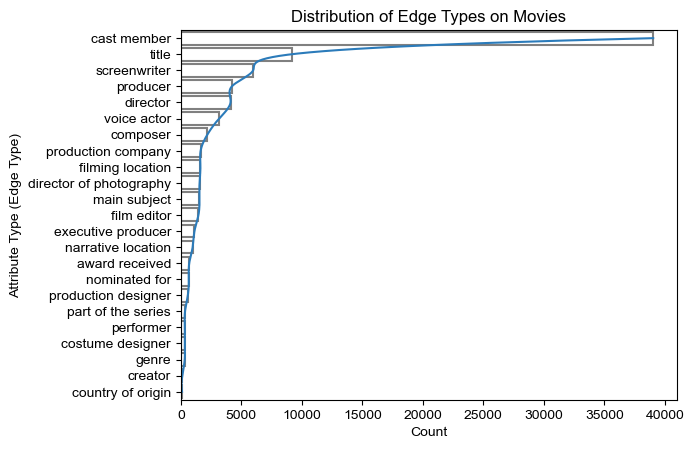

In [11]:
plot_long_tail(p_new, 'prop', 'movieId', "Attribute Type (Edge Type)", "Distribution of Edge Types on Movies")

In [12]:
genre_kg = kg_movies[kg_movies["prop"] == 'genre'].groupby('obj').count().sort_values(by='movieId', ascending=False)
genre_kg

,movieId,title,prop,imdbId
obj,,,,
drama,4081,4081,4081,4081
comedy film,2141,2141,2141,2141
action film,1685,1685,1685,1685
crime film,1026,1026,1026,1026
romantic comedy,1021,1021,1021,1021
...,...,...,...,...
mockbuster,1,1,1,1
music video,1,1,1,1
musical comedy,1,1,1,1


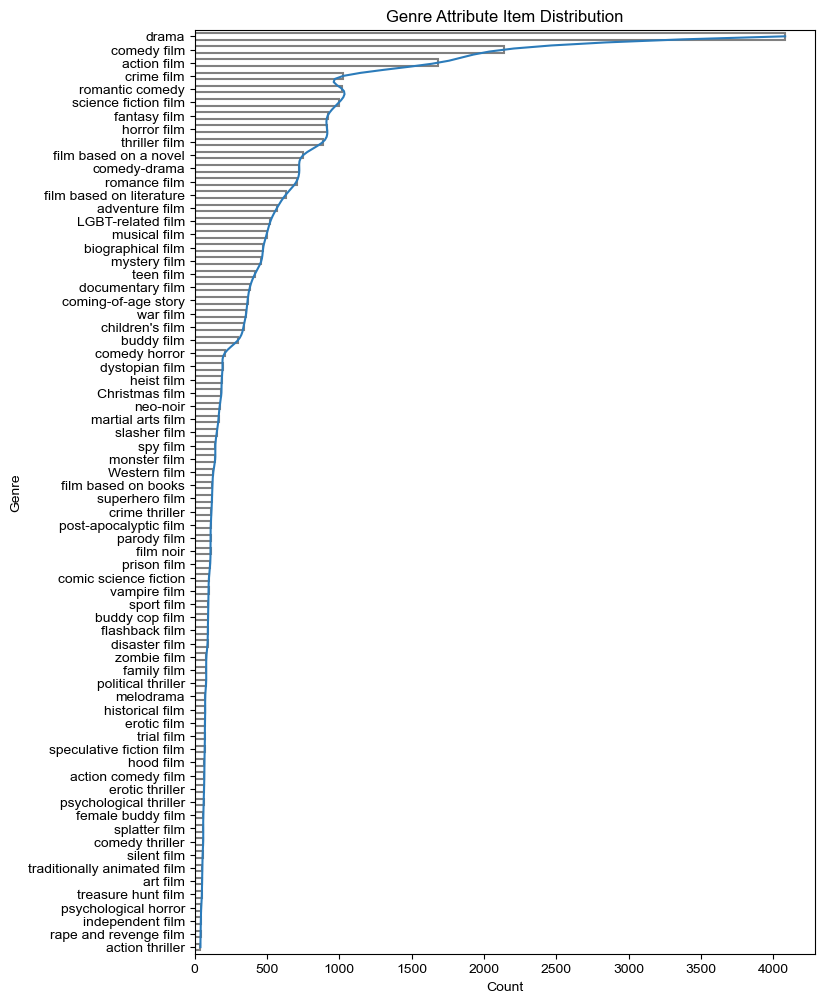

In [13]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import make_interp_spline

plt.figure(figsize=(8, 12))

p_new = genre_kg.reset_index()[:70]

# Swap x and y
y = p_new.index   # Now becomes y
x = p_new['movieId']  # Now becomes x

# Interpolation
ynew = np.linspace(y.min(), y.max(), 300)
gfg = make_interp_spline(y, x, k=3)  # Swap x and y in spline

x_new = gfg(ynew)  # Compute new interpolated x values

# Plot flipped graph
plt.plot(x_new, ynew,  color=sns.color_palette(palette='Blues').as_hex()[:][-2])
plt.rcParams.update({"font.family": "Arial"}) 

# Labels & Title
plt.xlabel("Count")  # Now x-axis
plt.ylabel("Genre")  # Now y-axis
plt.title("Genre Attribute Item Distribution")

sns.barplot(data=p_new, y="obj", x="movieId", err_kws={"color": ".5", "linewidth": 3},
    linewidth=1.5, edgecolor=".5", facecolor=(0, 0, 0, 0), width=0.5)

plt.show()


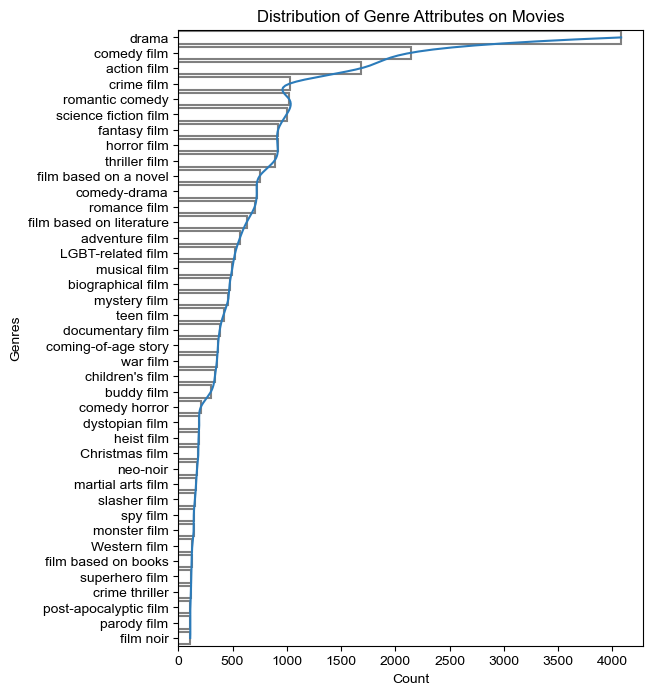

In [14]:
plot_long_tail(genre_kg, 'obj', 'movieId', "Genres", "Distribution of Genre Attributes on Movies", size=40, figsize=(6, 8))

In [15]:
p_new

,obj,movieId,title,prop,imdbId
0,drama,4081,4081,4081,4081
1,comedy film,2141,2141,2141,2141
2,action film,1685,1685,1685,1685
3,crime film,1026,1026,1026,1026
4,romantic comedy,1021,1021,1021,1021
...,...,...,...,...,...
65,treasure hunt film,50,50,50,50
66,psychological horror,45,45,45,45
67,independent film,43,43,43,43
68,rape and revenge film,41,41,41,41


In [16]:
print(x)
print(y)

0     4081
1     2141
2     1685
3     1026
4     1021
      ... 
65      50
66      45
67      43
68      41
69      40
Name: movieId, Length: 70, dtype: int64
RangeIndex(start=0, stop=70, step=1)


In [17]:
kg_award = kg_movies[kg_movies["prop"] == 'award received'].groupby('obj').count().sort_values(by='movieId', ascending=False)
kg_award

,movieId,title,prop,imdbId
obj,,,,
National Board of Review: Top Ten Films,598,598,598,598
National Film Registry,373,373,373,373
Academy Award for Best Picture,86,86,86,86
Academy Award for Best Director,83,83,83,83
"Academy Award for Best Writing, Adapted Screenplay",83,83,83,83
...,...,...,...,...
Golden Globe Award,1,1,1,1
Golden Eagle Award for Best Motion Picture,1,1,1,1
Golden Eagle Award,1,1,1,1


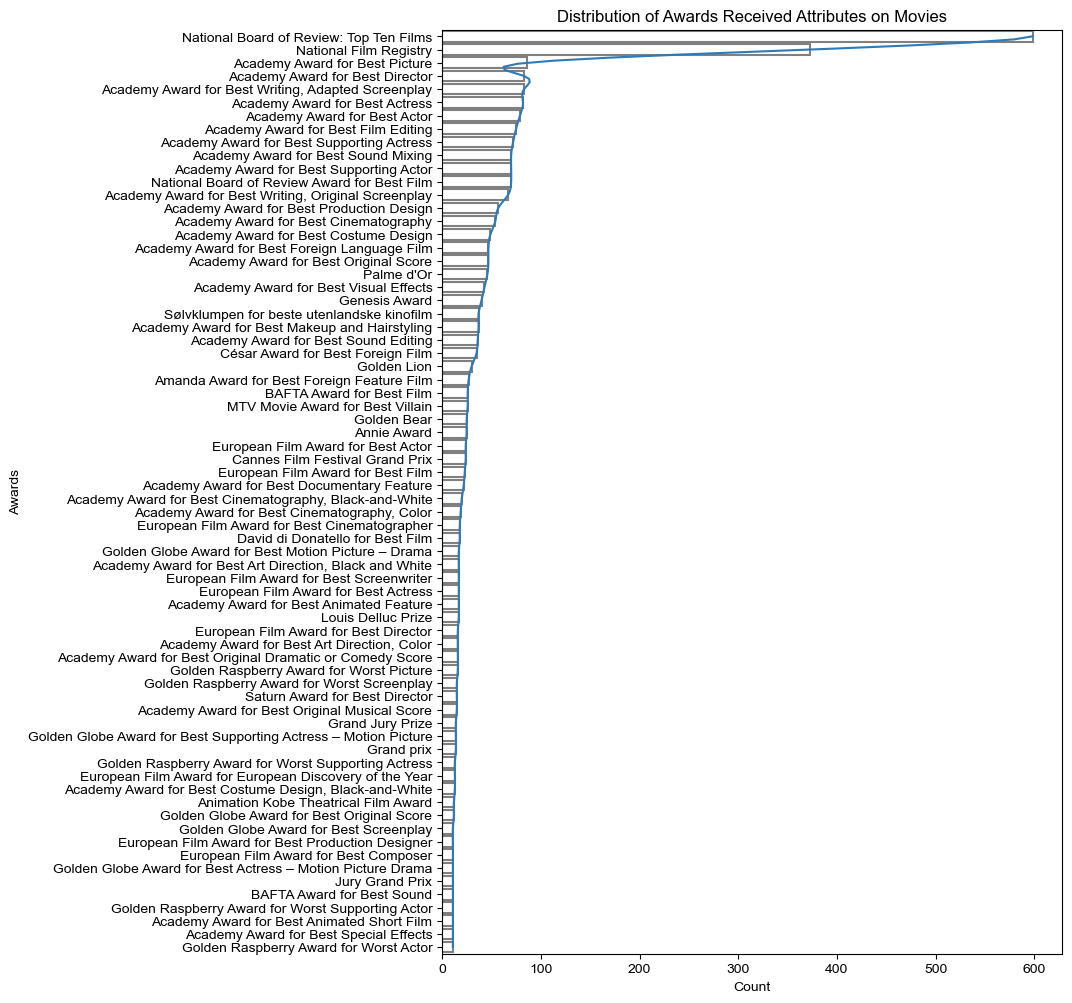

In [18]:
plot_long_tail(kg_award, 'obj', 'movieId', "Awards", "Distribution of Awards Received Attributes on Movies", size=70, figsize=(8, 12))

In [19]:
kg_movies['prop'].unique()

array(['director', 'screenwriter', 'composer', 'genre', 'cast member',
       'producer', 'award received', 'director of photography',
       'country of origin', 'filming location', 'main subject',
       'film editor', 'nominated for', 'title', 'creator',
       'narrative location', 'costume designer', 'performer',
       'production company', 'part of the series', 'voice actor',
       'executive producer', 'production designer'], dtype=object)

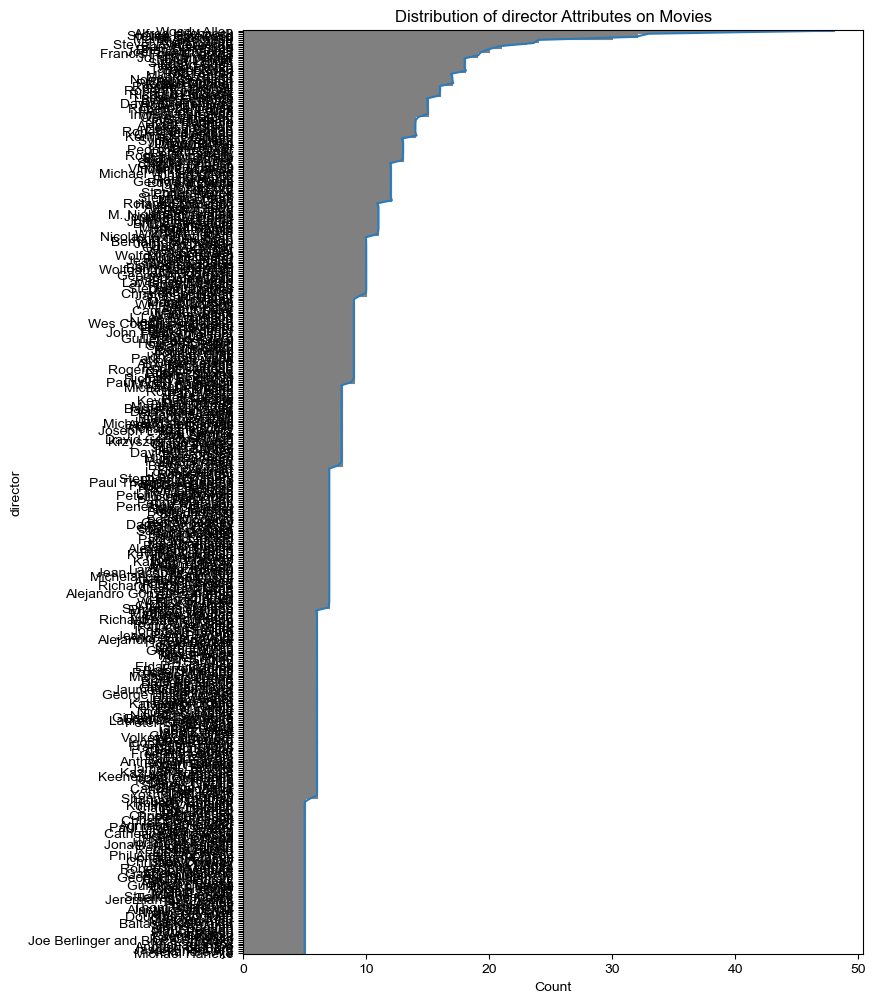

In [20]:
kg_award = kg_movies[kg_movies["prop"] == 'director'].groupby('obj').count().sort_values(by='movieId', ascending=False)
plot_long_tail(kg_award, 'obj', 'movieId', "director", "Distribution of director Attributes on Movies", size=500, figsize=(8, 12))

### Artists KG

In [21]:
kg_artist = pd.read_csv("./props_artists_id.csv")
kg_artist

,id,artist,prop,obj,wiki_id,name
0,1,Malice Mizer,work period (start),1992-01-01T00:00:00Z,Q853545,MALICE MIZER
1,1,Malice Mizer,has part,Mana,Q853545,MALICE MIZER
2,1,Malice Mizer,country of origin,Japan,Q853545,MALICE MIZER
3,1,Malice Mizer,record label,Nippon Columbia,Q853545,MALICE MIZER
4,1,Malice Mizer,record label,Columbia Records,Q853545,MALICE MIZER
...,...,...,...,...,...,...
134192,18517,V Factory,has part,Jared Murillo,Q3305177,V Factory
134193,18517,V Factory,country of origin,United States of America,Q3305177,V Factory
134194,18517,V Factory,record label,Warner Bros. Records,Q3305177,V Factory
134195,18517,V Factory,genre,rhythm and blues,Q3305177,V Factory


In [22]:
', '.join(list(kg_artist["prop"].unique()))

'work period (start), has part, country of origin, record label, genre, inception, location of formation, country, languages spoken, written or signed, instrument, occupation, date of birth, voice type, member of, place of birth, sex or gender, educated at, country of citizenship, notable work, award received, field of work, residence, work location, religion, native language, participant in, influenced by, director / manager, nominated for, represented by, wears, sport, participant'

In [23]:
po = kg_artist.groupby(['prop', 'obj']).count()
po

id  artist  \
prop                obj                                                   
award received      "Spirit of Americana" Free Speech Award  12      12   
                    1 Live Krone                              5       5   
                    100 Greatest African Americans            1       1   
                    100 Greatest Britons                      2       2   
                    2009 Teen Choice Awards                   2       2   
...                                                          ..     ...   
work period (start) 2017-01-01T00:00:00Z                      2       2   
                    2018-01-01T00:00:00Z                      3       3   
                    2019-01-01T00:00:00Z                      3       3   
                    2020-01-01T00:00:00Z                      2       2   
                    2030-01-01T00:00:00Z                      1       1   

                                                             wiki_id  name  
prop                obj                                                     
award received      "Spirit of Americana" Free Speech Award       12    12  
                    1 Live Krone                                   5     5  
                    100 Greatest African Americans                 1     1  
                    100 Greatest Britons                           2     2  
                    2009 Teen Choice Awards                        2     2  
...                                                              ...   ...  
work period (start) 2017-01-01T00:00:00Z                           2     2  
                    2018-01-01T00:00:00Z                           3     3  
                    2019-01-01T00:00:00Z                           3     3  
                    2020-01-01T00:00:00Z                           2     2  
                    2030-01-01T00:00:00Z                           1     1  

[24837 rows x 4 columns]

In [24]:
p_artist = po.groupby('prop').count().sort_values(by="id", ascending=False)
p_artist

,id,artist,wiki_id,name
prop,,,,
has part,6589,6589,6589,6589
date of birth,3864,3864,3864,3864
record label,2431,2431,2431,2431
place of birth,2014,2014,2014,2014
educated at,1673,1673,1673,1673
award received,1353,1353,1353,1353
location of formation,1323,1323,1323,1323
notable work,966,966,966,966
genre,833,833,833,833


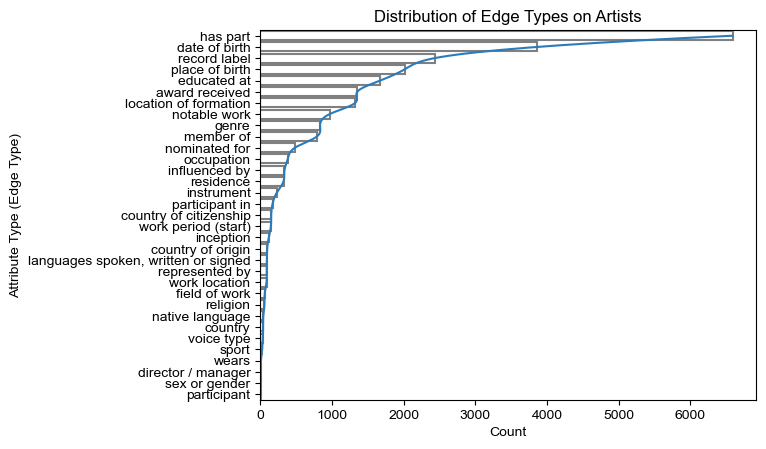

In [25]:
plot_long_tail(p_artist, 'prop', 'id', "Attribute Type (Edge Type)", "Distribution of Edge Types on Artists")

In [26]:
a_genre_kg = kg_artist[kg_artist["prop"] == 'genre'].groupby('obj').count().sort_values(by='id', ascending=False)
a_genre_kg

,id,artist,prop,wiki_id,name
obj,,,,,
pop music,1294,1294,1294,1294,1294
alternative rock,1036,1036,1036,1036,1036
rock music,860,860,860,860,860
punk rock,676,676,676,676,676
indie rock,598,598,598,598,598
...,...,...,...,...,...
calypso music,1,1,1,1,1
new wave of new wave,1,1,1,1,1
chanson réaliste,1,1,1,1,1


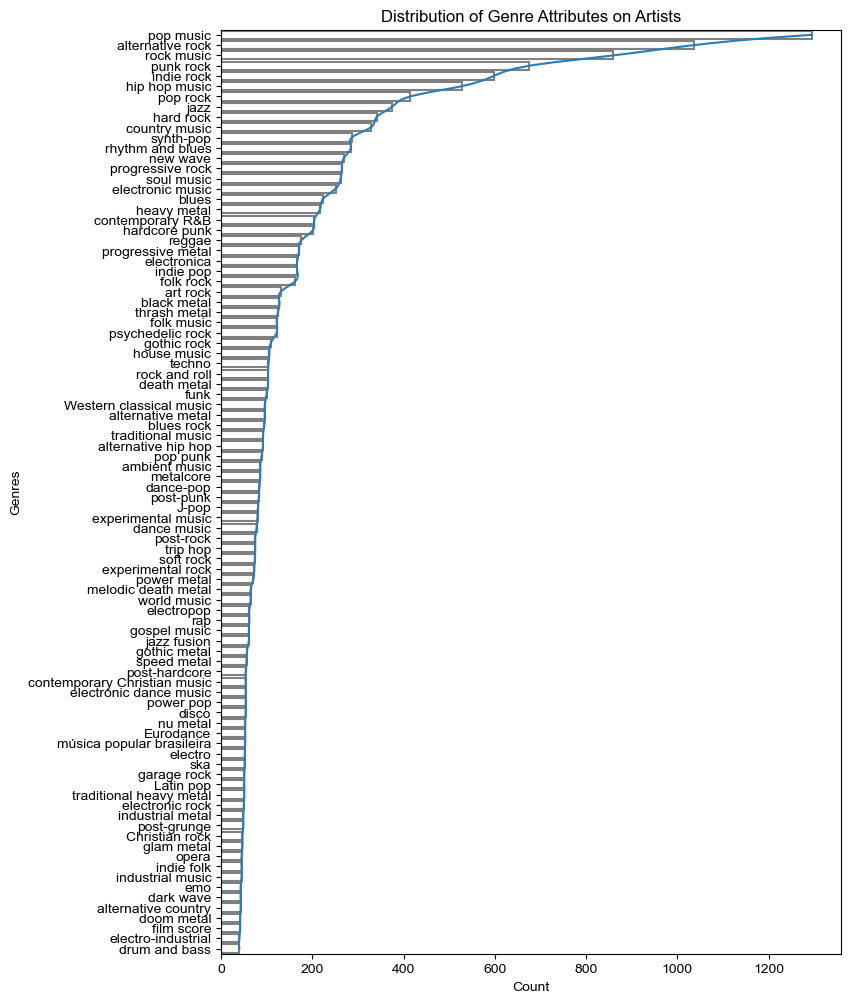

In [27]:
plot_long_tail(a_genre_kg, 'obj', 'id', "Genres", "Distribution of Genre Attributes on Artists", size=90, figsize=(8, 12))

In [28]:
kg_artist[kg_artist['prop'] == "director / manager"]['obj'].unique()

array(['Guy Oseary', 'Brian Epstein', 'Bertis Downs IV', 'Jefferson Holt',
       'Steve Sesnick', 'Andy Warhol', 'Simon Fuller',
       'Andreas Bär Läsker'], dtype=object)

In [29]:
kg_artist[kg_artist['prop'] == "genre"]['obj'].unique()

array(['art rock', 'progressive rock', 'dark wave', 'electro-industrial',
       'black metal', 'symphonic metal', 'gothic metal', 'punk rock',
       'rock music', 'alternative metal', 'hard rock', 'glam rock',
       'shock rock', 'industrial rock', 'industrial metal', 'nu metal',
       'progressive metal', 'metalcore', 'symphonic black metal',
       'gothic rock', 'power noise', 'electro', 'extreme metal',
       'pop music', 'techno', 'electronic body music', 'post-punk',
       'experimental music', 'avant-garde music', 'industrial music',
       'synth-pop', 'futurepop', 'Neue Deutsche Todeskunst', 'neofolk',
       'medieval music', 'indie rock', 'electronica', 'alternative rock',
       'opera', 'Western classical music', 'symphony', 'ballet',
       'Romantic music', 'art pop', 'New Romantic', 'new wave',
       'electronic music', 'trip hop', 'jazz', 'lounge music',
       'chill-out music', 'dream pop', 'downtempo', 'pop rock',
       'dance-pop', 'nu-disco', 'country pop'

In [30]:
len(kg_artist[kg_artist['prop'] == "genre"]['obj'].unique())

833